# JupyterLab Demonstration
While the main purpose of this notebook is to show the end result of a simple build pipeline, the notebook also show some basic data science techniques. In the notebook, we will:
1. Show basic data visualization of data from two different location
2. Perform a gap analysis and peer benchmarking

The data sets are fictious, but it is useful in simulating a large data set that might be encountered when performing analysis or obtaining data from web scrapping.  


---

## Scenario

You are an executive at **Vivendi Universal**. Other members of the C-Suite team have concerns that they're not keeping up with their peers (competitors in the peer group are THQ, Ubisoft, Lucas Arts, Sony and Electronic Arts). Teammates have commented that Vivendi’s average revenue per game over time when compared against those of it's peers is not keeping up. Some of the Programmers and Game Testers at Vivendi believe the reason the company is not keeping up with their peers is because their peers produce more video games that are violent. This poses two questions that need to be answered for the executive team:

### Questions:
  1. Is it true that violent video games earn more revenue on average than non‐violent video games?
  2. Are Vivendi games significantly different in terms of violent content than the games from members of its peer group?


---

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats

---

## Import Data

### Game Specific Data

In [2]:
genre_data = pd.read_csv("game-genre-data.csv")
# Confirm data import was a success.
genre_data.head(2)

,COMB Title,NumberOfConsoles,GCN,XBX,PS2,Brand,License,Publisher,Developer,NPD Super Genre,NPD Sub Genre,Launch,Launch Year,Launch Month,ESRB,Online,Vivendi,Peer group,Violent genre
0,.HACK: INFECTION,1,0,0,1,.HACK,NaN,BANDAI,CYBERCONNECT2,RPG,RPG,01-Feb-03,2003,2,T,NO,No,No,Non violent
1,.HACK: MUTATION,1,0,0,1,.HACK,NaN,BANDAI,CYBERCONNECT2,RPG,RPG,01-May-03,2003,5,T,NO,No,No,Non violent


In [3]:
# Confirm we have same number of rows
genre_data.shape

(1256, 19)

### Game Sales Data

In [4]:
sales_data = pd.read_csv("game-sales-data.csv")
sales_data.head(2)

,COMB Title,Review,AvgReleaseYearPrice,PriorSaleBrand (M),TotalPriorSalesBrand (M),ConcurrentReleaseBrand,ConcurrentReleaseGenre,PriorReleaseBrand,PriorReleaseGenre,FirstYearUnits,FirstYearSales (M),FirstYearRatio,LTD ASP,LTD Units,LTD Dollars (M)
0,.HACK: INFECTION,76.599998,42.0,0.0,0.0,2,15,0,28,341506,14.08,92.09%,38.0,402687,15.29
1,.HACK: MUTATION,74.099998,44.0,0.0,0.0,2,15,0,28,166288,7.14,92.92%,41.0,185581,7.68


In [5]:
sales_data.shape

(1256, 15)

### Combine into Single Data Frame

In [6]:
data = pd.merge(genre_data, sales_data)
data.head(2)

,COMB Title,NumberOfConsoles,GCN,XBX,PS2,Brand,License,Publisher,Developer,NPD Super Genre,...,ConcurrentReleaseBrand,ConcurrentReleaseGenre,PriorReleaseBrand,PriorReleaseGenre,FirstYearUnits,FirstYearSales (M),FirstYearRatio,LTD ASP,LTD Units,LTD Dollars (M)
0,.HACK: INFECTION,1,0,0,1,.HACK,NaN,BANDAI,CYBERCONNECT2,RPG,...,2,15,0,28,341506,14.08,92.09%,38.0,402687,15.29
1,.HACK: MUTATION,1,0,0,1,.HACK,NaN,BANDAI,CYBERCONNECT2,RPG,...,2,15,0,28,166288,7.14,92.92%,41.0,185581,7.68


---

## Data Exploration

In [7]:
data[['LTD Dollars (M)']].describe().round(2)

,LTD Dollars (M)
count,1256.00
mean,13.33
std,26.57
min,0.00
25%,1.62
50%,4.06
75%,13.23
max,293.02


### Visualization by Non-Violent and Violent

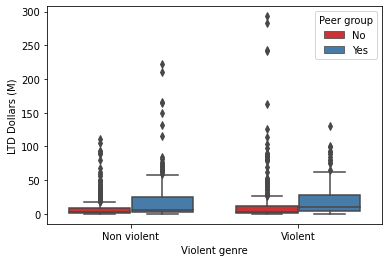

In [8]:
df = data[['COMB Title', 'LTD Dollars (M)','Peer group', 'Violent genre']]
box_plot = sns.boxplot(x = df['Violent genre'], y = df["LTD Dollars (M)"], hue = df['Peer group'], palette="Set1", width = 0.75)

### Blown Up View of Boxplot

[(0.0, 30.0)]

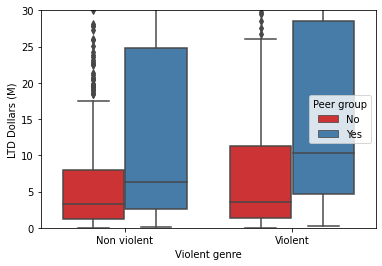

In [9]:
big_box_plot = sns.boxplot(x = df['Violent genre'], y = df["LTD Dollars (M)"], hue = df['Peer group'], palette="Set1", width = 0.75)
big_box_plot.set(ylim=(0,30))

---

## Question 1
**Is it true that violent video games earn more revenue on average than non‐violent video games?**

### Answer:
**Yes, violent video games do earn more revenue** on average than non-violent video games.

We can utilize a pivot table to show the correlation between average life to date (LTD) revenues for violent and non-violent video games. 

In [10]:
ltd_sales = data[['COMB Title', 'LTD Dollars (M)','Peer group', 'Violent genre']]
pivot_table = pd.pivot_table(ltd_sales, values = ['LTD Dollars (M)'], index=['Peer group'] , columns = ['Violent genre'])
pivot_table

LTD Dollars (M)           
Violent genre     Non violent    Violent
Peer group                              
No                   8.168813  14.175191
Yes                 20.098174  21.232403

---

## Question 2
**Are Vivendi games significantly different in terms of violent content than the games from members of its peer group?**

### Answer:
**Yes, Vivendi games are significantly different** in terms of violent content than the games from members of its peer group as determined from a contingency table and Chi-Square test.

### Explanation:
- In statistics, the **null hypothesis** is your initial assumption and is usually one of equality.
- In hypothesis testing, the **probability value (p-value)** is the probability of obtaining test results at least as extreme as the results actually observed during the test, **assuming that the null hypothesis is correct**.
- We can use a **Chi-Square test to test** for an association between variables:
    - If the observed frequencies **equal** the expected frequencies, there is **no association between the variables**.
    - If the observed frequencies **do not equal** the expected frequencies, **there is an association between the variables**.

In [11]:
# First, lets filter the data to include only our peer group.
peer_mask = data['Peer group'] == "Yes"
peers = data[peer_mask]

#### Observed Relative Frequency Table

In [12]:
orf_table = pd.crosstab([data['Vivendi'], peers['Peer group']],data['Violent genre'] ,margins = True)
orf_table

,Violent genre,Non violent,Violent,All
Vivendi,Peer group,,,
No,Yes,219,102,321
Vivendi,Yes,11,27,38
All,,230,129,359


#### Expected Frequency Table

In [13]:
chi = stats.chi2_contingency(orf_table)
ef_table = pd.DataFrame(chi[3], index = ['Peer Group', 'Vivendi', 'Total'], columns = ['Non-Violent', 'Violent', 'Total'])
ef_table

,Non-Violent,Violent,Total
Peer Group,205.654596,115.345404,321.0
Vivendi,24.345404,13.654596,38.0
Total,230.000000,129.000000,359.0


As the observed frequencies do not equal the expected frequencies, there appears to be an association between these two variables. **However**, we don't know whether the association is statistically significant. We must run a **Chi-Square Test**.


#### Chi-Squared Test of Independence

In [14]:
chi_table = pd.DataFrame([chi[0],chi[1], chi[2]],index = ['Chi-Squared Statistic', 'P-Value', 'Degrees of Freedom'], columns = ['Value'])
chi_table

,Value
Chi-Squared Statistic,22.768825
P-Value,0.000141
Degrees of Freedom,4.000000


The first row is the Chi-Square Statistic. We can safely ignore this for our analysis.

The second line is the **p-value**, or the probability of getting a Chi-Square Statistic that large if the two variables are independent. This p-value is very small (less than 0.05), so **we can accept our alternative hypothesis**: 

### **There is a relationship between publishers and the violent video games they produce**.


---